# Analyze classes

## Initial setup

### Load modules

In [1]:
# modules in this package
import load_and_preprocess as lp
import analysis as at
import bic_and_aic as ba
import plot_tools as pt
import file_io as io
import numpy as np
import xarray as xr
import density
import gmm
# plotting tools
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib as mpl
import cmocean
# os tools
import os.path

# suppress a particular warning
import warnings
warnings.filterwarnings('ignore', 'RuntimeWarning: All-NaN slice encountered')

### Set runtime parameters (file locations, etc.)

In [2]:
# set locations and names
descrip = 'WeddellOnly' # extra description for filename
data_location = '../../so-chic-data/' # input data location
classified_data_location = 'models/profiles_-65to80lon_-85to-30lat_20to1000depth_5K_allDomain_revised.nc'
ploc = 'plots/plots_WeddellClassOnly_top1000m_K04_forPaperRevisions/'
#ploc = 'tests/'
dloc = 'models/'

# if plot directory doesn't exist, create it
if not os.path.exists(ploc):
    os.makedirs(ploc)
    
# if tSNE directory doesn't exist, create it
if not os.path.exists(ploc+'/tSNE/'):
    os.makedirs(ploc+'/tSNE/')

# save the processed output as a NetCDF file?
saveOutput = False

# number of PCA components (roughly 95%)
n_pca = 6

# make decision about n_components_selected (iterative part of analysis)
n_components_selected = 4

#longitude and latitude range
lon_min = -65
lon_max =  80
lat_min = -80
lat_max = -45
# depth range
zmin = 20.0
zmax = 1000.0
# density range
sig0range = (26.6, 28.0)

# temperature and salinity ranges for plotting
lon_range=(lon_min, lon_max)
lat_range=(lat_min, lat_max)
Trange=(-2.2, 6.0)
Srange=(33.5, 35.0)

# create filename for saving GMM and saving labelled profiles
pca_fname = dloc + 'pca_' + str(int(lon_min)) + 'to' + str(int(lon_max)) + 'lon_' + str(int(lat_min)) + 'to' + str(int(lat_max)) + 'lat_' + str(int(zmin)) + 'to' + str(int(zmax)) + 'depth_' + str(int(n_pca)) + descrip
gmm_fname = dloc + 'gmm_' + str(int(lon_min)) + 'to' + str(int(lon_max)) + 'lon_' + str(int(lat_min)) + 'to' + str(int(lat_max)) + 'lat_' + str(int(zmin)) + 'to' + str(int(zmax)) + 'depth_' + str(int(n_components_selected)) + 'K_' + descrip
fname = dloc + 'profiles_' + str(int(lon_min)) + 'to' + str(int(lon_max)) + 'lon_' + str(int(lat_min)) + 'to' + str(int(lat_max)) + 'lat_' + str(int(zmin)) + 'to' + str(int(zmax)) + 'depth_' + str(int(n_components_selected)) + 'K_' + descrip + '.nc'

# colormap
colormap = plt.get_cmap('Dark2', n_components_selected)
colormap_cividis = plt.get_cmap('cividis', 20)

### Load classified profile data

In [3]:
dfp = xr.open_dataset("weddell_classified_n04.nc")
# select the top pressure level for plotting purposes
df1D = dfp.isel(depth=0)

### Dynamic height

0=transition, 1=gyre core, 2=gyre edge, 3=circumpolar
class = 0
min / Q25 / Q50 / Q75 / max
-3.26 / -2.48 / -2.29 / -2.07 / -1.44
class = 1
min / Q25 / Q50 / Q75 / max
-2.20 / -1.72 / -1.63 / -1.55 / -1.33
class = 2
min / Q25 / Q50 / Q75 / max
-3.19 / -2.13 / -1.98 / -1.85 / -1.35
class = 3
min / Q25 / Q50 / Q75 / max
-3.90 / -3.20 / -2.99 / -2.81 / -2.03
----- Dynamic height: 500 dbar -----
plot_tools.plot_hist_map
file_io.load_bathymetry


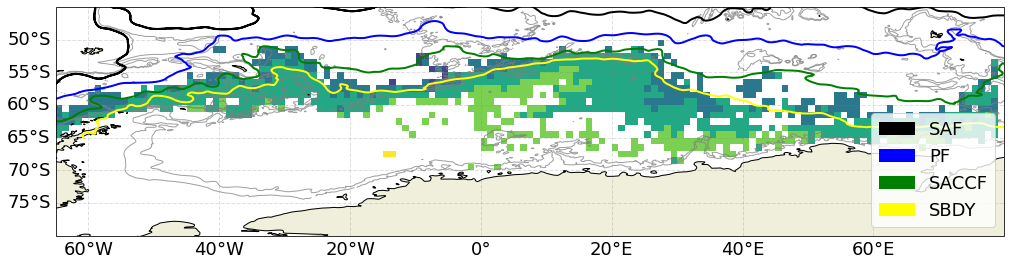

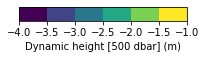

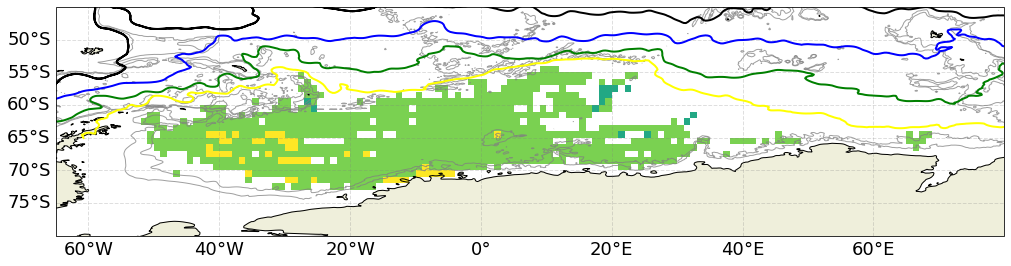

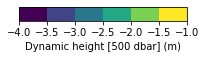

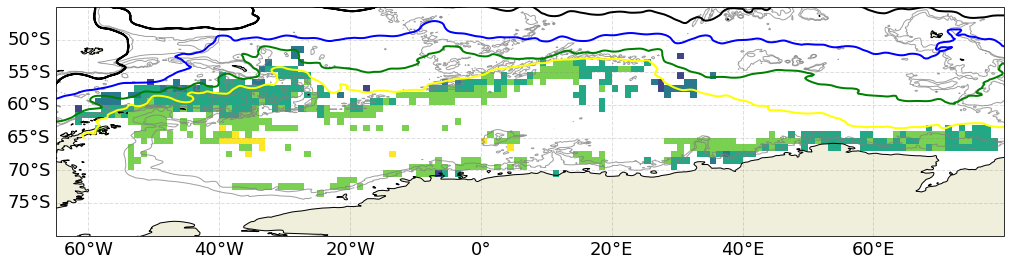

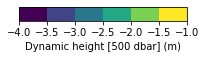

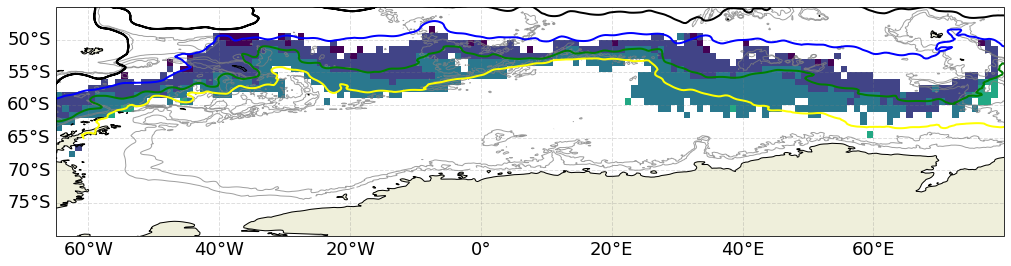

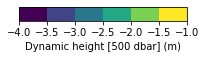

In [4]:
# stats at 500mb
print('0=transition, 1=gyre core, 2=gyre edge, 3=circumpolar')
at.calc_oneLevel_stats(ploc, dfp.isel(depth=14), n_components_selected, varname='dyn_height')

# plot maps of dynamic height  
#pt.plot_dynamic_height_maps(ploc, dfp, lon_range, lat_range, n_components_selected)

# just plot the 500 dbar dynamic height
dploc = ploc + 'dynamic_height/p0500dbar/'
print('----- Dynamic height: 500 dbar -----')
if not os.path.exists(dploc):
    os.makedirs(dploc)
# single pressure level
dp1 = dfp.isel(depth=14)
pt.plot_hist_map(dploc, dp1, lon_range, lat_range, 
                 n_components_selected,
                 which_contours='fH',
                 vartype='dyn_height')

### imetric

0=transition, 1=gyre core, 2=gyre edge, 3=circumpolar
class = 0
min / Q25 / Q50 / Q75 / max
0.00 / 0.01 / 0.11 / 0.41 / 1.00
class = 1
min / Q25 / Q50 / Q75 / max
0.00 / 0.00 / 0.01 / 0.04 / 1.00
class = 2
min / Q25 / Q50 / Q75 / max
0.00 / 0.00 / 0.00 / 0.28 / 1.00
class = 3
min / Q25 / Q50 / Q75 / max
0.00 / 0.00 / 0.00 / 0.08 / 1.00
plot_tools.plot_hist_map
file_io.load_bathymetry


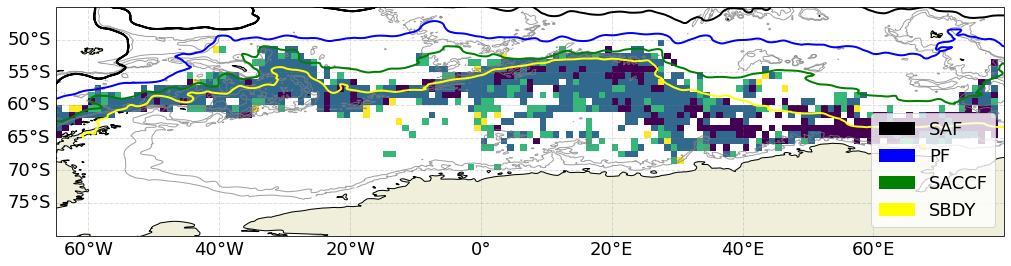

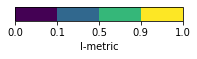

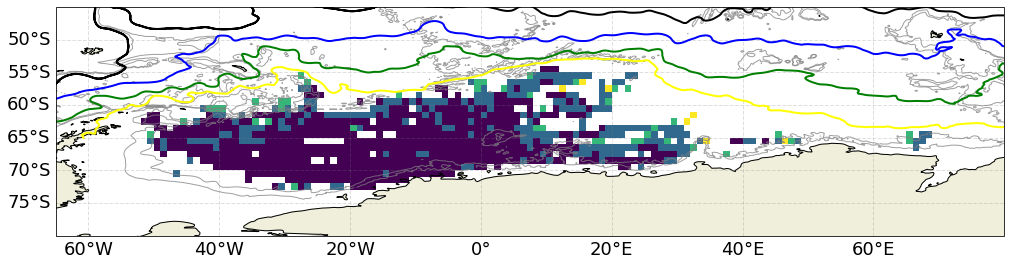

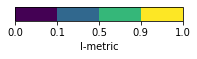

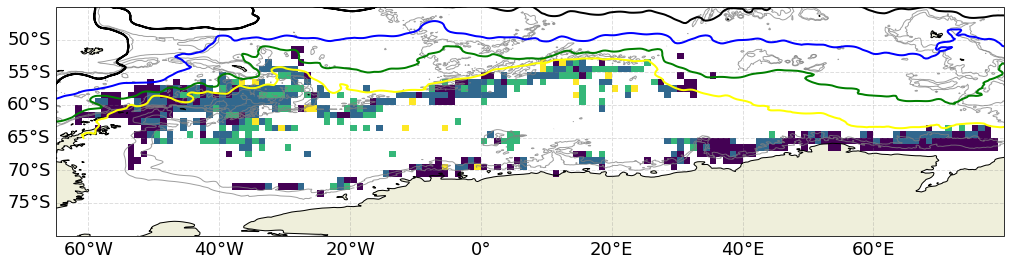

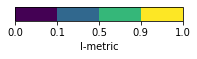

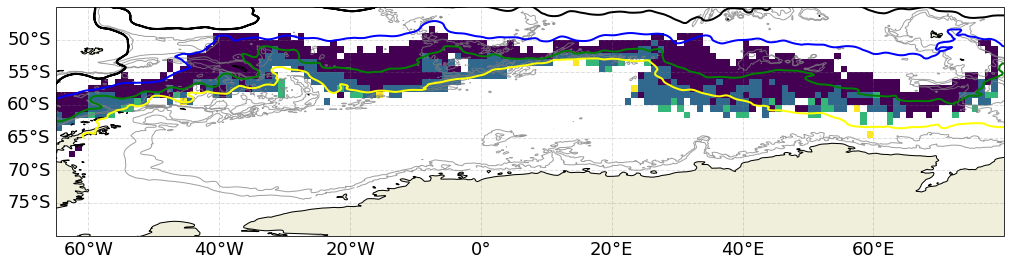

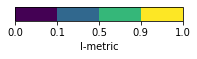

In [5]:
# print mld stats
print('0=transition, 1=gyre core, 2=gyre edge, 3=circumpolar')
at.calc_oneLevel_stats(ploc, dfp, n_components_selected, 'imetric')

# histogram map (imetric)
pt.plot_hist_map(ploc, df1D, lon_range, lat_range,
                 n_components_selected,
                 which_contours='fH',
                 vartype='imetric')

### Mixed layer depth 

0=transition, 1=gyre core, 2=gyre edge, 3=circumpolar
class = 0
min / Q25 / Q50 / Q75 / max
44.36 / 116.48 / 136.99 / 159.68 / 349.35
class = 1
min / Q25 / Q50 / Q75 / max
26.06 / 75.73 / 103.47 / 137.79 / 288.47
class = 2
min / Q25 / Q50 / Q75 / max
38.89 / 91.42 / 130.03 / 180.46 / 490.35
class = 3
min / Q25 / Q50 / Q75 / max
94.87 / 162.91 / 186.07 / 211.09 / 416.75
plot_tools.plot_hist_map
file_io.load_bathymetry


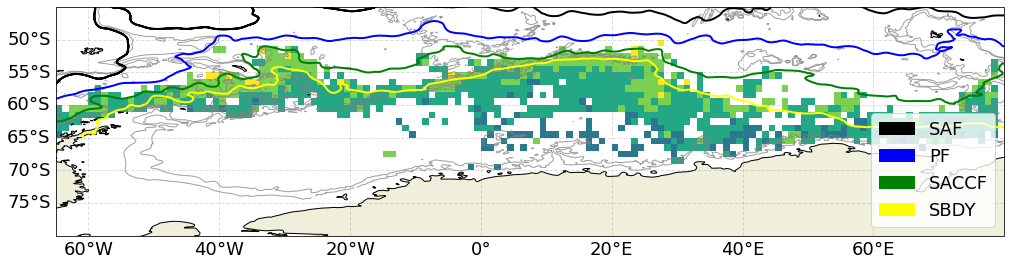

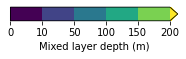

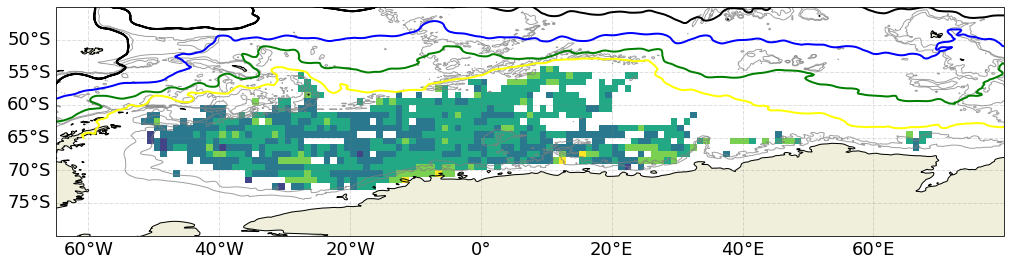

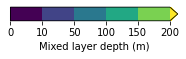

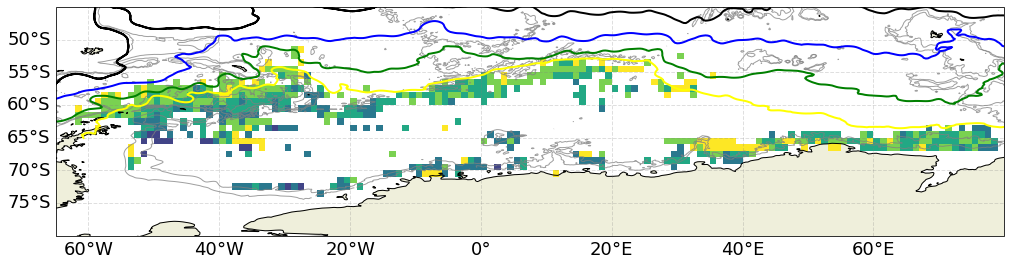

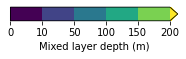

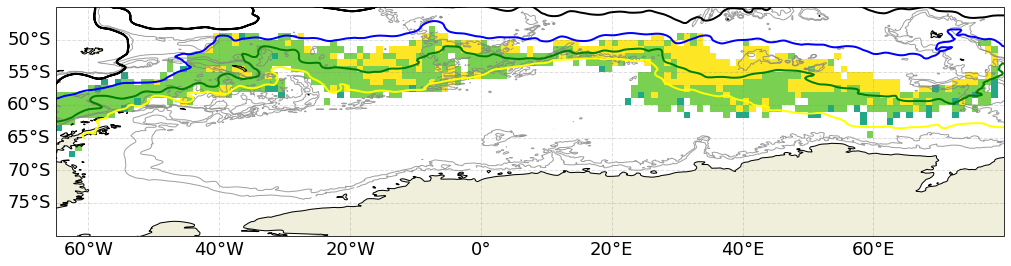

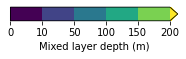

In [6]:
# print mld stats
print('0=transition, 1=gyre core, 2=gyre edge, 3=circumpolar')
at.calc_oneLevel_stats(ploc, dfp, n_components_selected)

# histogram map (mixed layer depth)
pt.plot_hist_map(ploc, dfp, lon_range, lat_range,
                 n_components_selected,
                 which_contours='fH',
                 vartype='mld')

### Depth of temperature minimum

0=transition, 1=gyre core, 2=gyre edge, 3=circumpolar
class = 0
min / Q25 / Q50 / Q75 / max
20.00 / 60.00 / 80.00 / 120.00 / 1000.00
class = 1
min / Q25 / Q50 / Q75 / max
20.00 / 20.00 / 60.00 / 80.00 / 140.00
class = 2
min / Q25 / Q50 / Q75 / max
20.00 / 20.00 / 80.00 / 100.00 / 910.00
class = 3
min / Q25 / Q50 / Q75 / max
20.00 / 100.00 / 120.00 / 140.00 / 1000.00
plot_tools.plot_hist_map
file_io.load_bathymetry


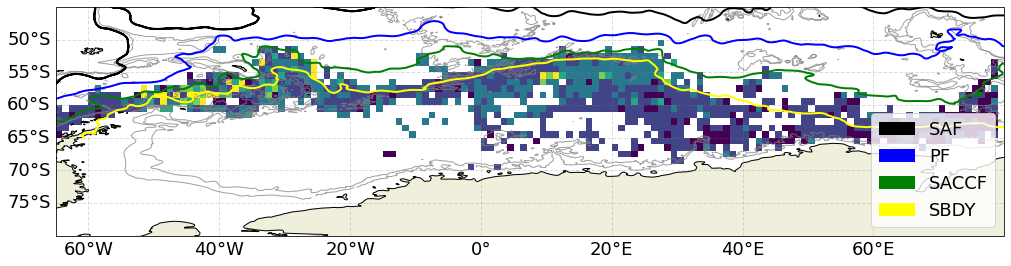

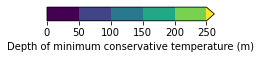

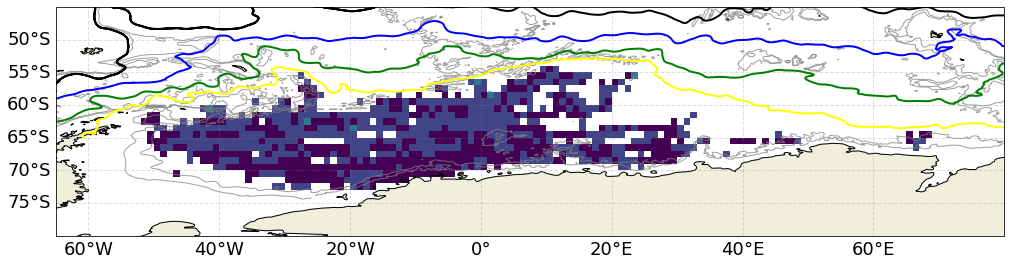

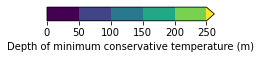

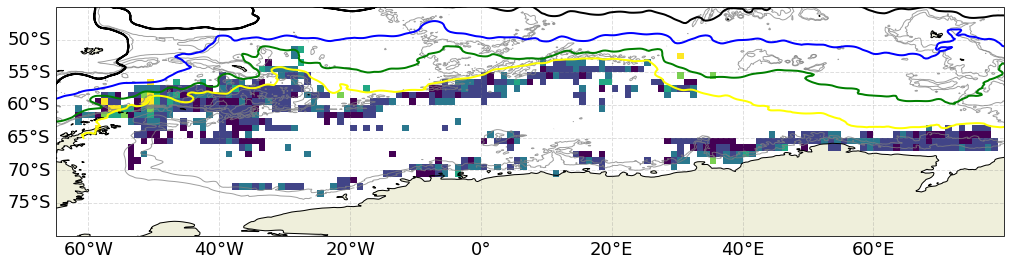

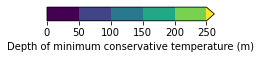

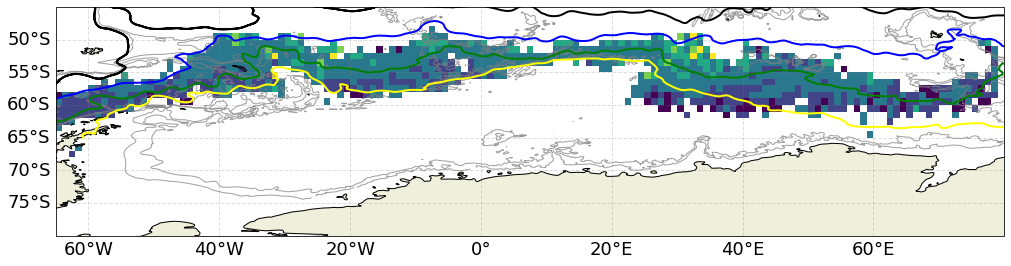

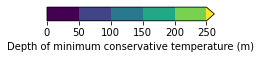

In [7]:
# print mld stats
print('0=transition, 1=gyre core, 2=gyre edge, 3=circumpolar')
at.calc_oneLevel_stats(ploc, dfp, n_components_selected, varname='Tmin_depth')

# histogram map (mixed layer depth)
pt.plot_hist_map(ploc, dfp, lon_range, lat_range,
                 n_components_selected,
                 which_contours='fH',
                 vartype='Tmin_depth')

### Minimum temperature

0=transition, 1=gyre core, 2=gyre edge, 3=circumpolar
class = 0
min / Q25 / Q50 / Q75 / max
-1.87 / -1.48 / -0.87 / -0.29 / 1.50
class = 1
min / Q25 / Q50 / Q75 / max
-1.90 / -1.84 / -1.78 / -1.63 / 0.09
class = 2
min / Q25 / Q50 / Q75 / max
-1.89 / -1.82 / -1.72 / -1.26 / 0.62
class = 3
min / Q25 / Q50 / Q75 / max
-1.87 / -0.41 / 0.16 / 0.65 / 1.89
plot_tools.plot_hist_map
file_io.load_bathymetry


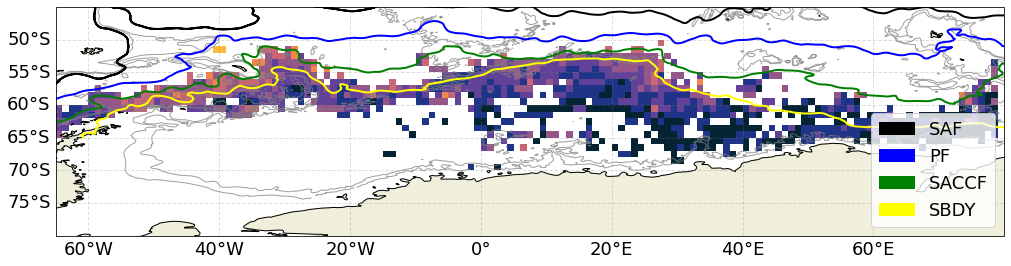

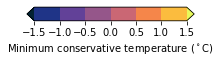

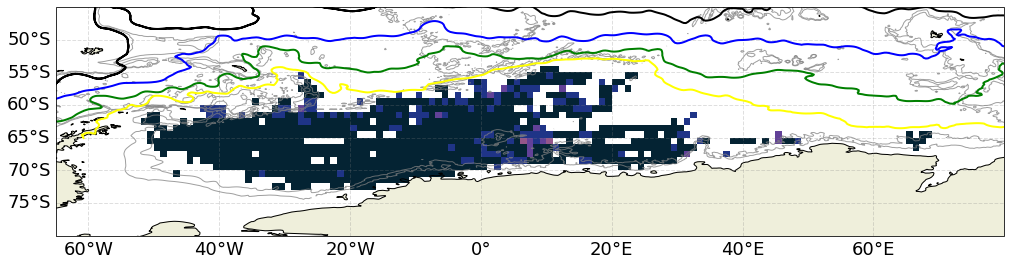

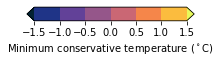

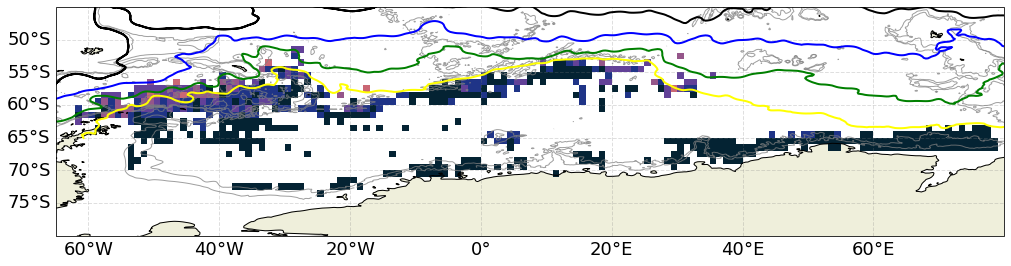

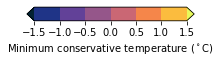

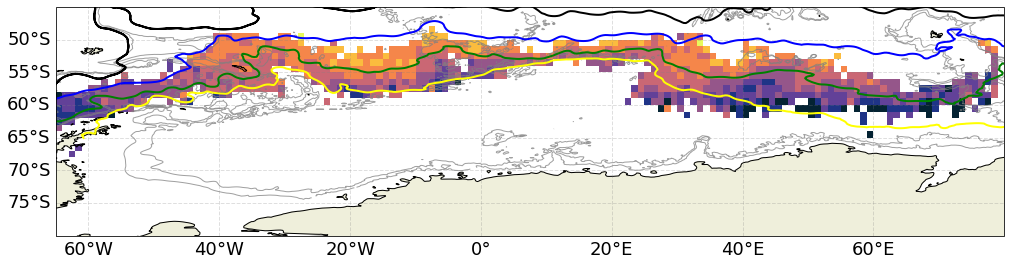

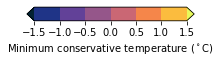

In [8]:
# print stats
print('0=transition, 1=gyre core, 2=gyre edge, 3=circumpolar')
at.calc_oneLevel_stats(ploc, dfp, n_components_selected, 'Tmin')

# histogram map (Tmax)
pt.plot_hist_map(ploc, df1D, lon_range, lat_range,
                 n_components_selected,
                 vartype='Tmin',
                 colormap=cmocean.cm.thermal)

### Depth of temperature maximum

0=transition, 1=gyre core, 2=gyre edge, 3=circumpolar
class = 0
min / Q25 / Q50 / Q75 / max
20.00 / 200.00 / 320.00 / 380.00 / 1000.00
class = 1
min / Q25 / Q50 / Q75 / max
20.00 / 200.00 / 260.00 / 320.00 / 820.00
class = 2
min / Q25 / Q50 / Q75 / max
20.00 / 380.00 / 500.00 / 560.00 / 1000.00
class = 3
min / Q25 / Q50 / Q75 / max
20.00 / 40.00 / 380.00 / 440.00 / 910.00
plot_tools.plot_hist_map
file_io.load_bathymetry


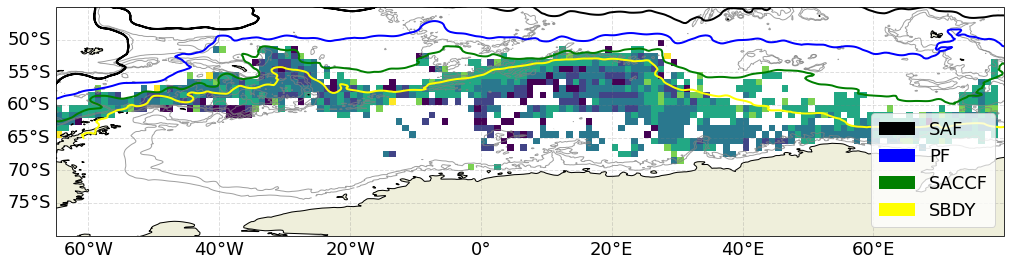

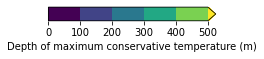

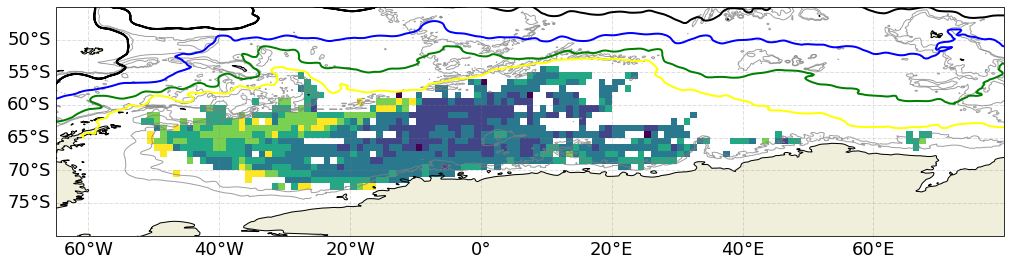

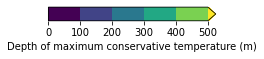

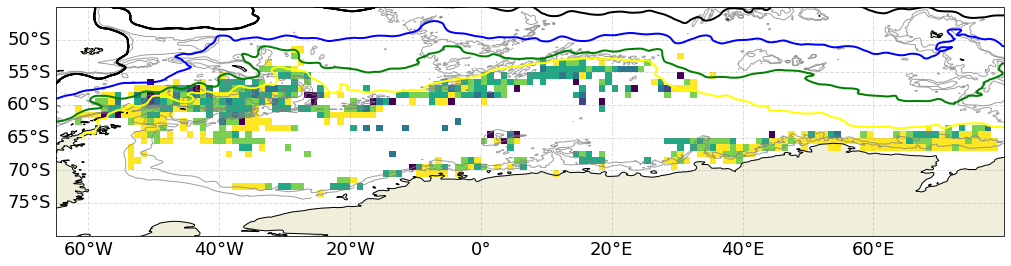

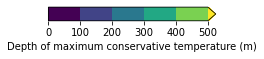

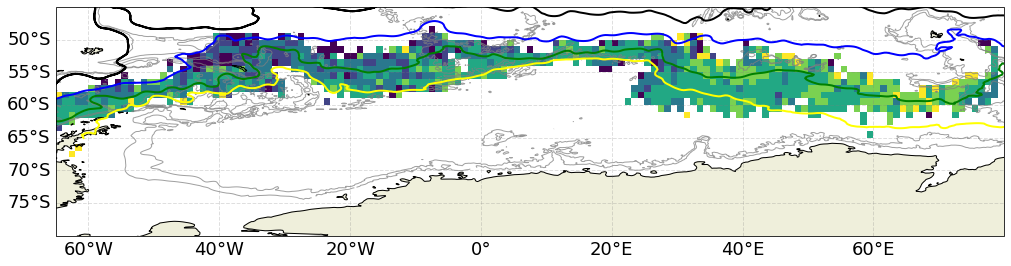

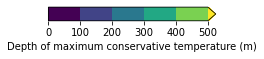

In [9]:
# print mld stats
print('0=transition, 1=gyre core, 2=gyre edge, 3=circumpolar')
at.calc_oneLevel_stats(ploc, dfp, n_components_selected, varname='Tmax_depth')

# histogram map (mixed layer depth)
pt.plot_hist_map(ploc, dfp, lon_range, lat_range,
                 n_components_selected,
                 vartype='Tmax_depth')

### Maximum temperature 

0=transition, 1=gyre core, 2=gyre edge, 3=circumpolar
class = 0
min / Q25 / Q50 / Q75 / max
0.33 / 1.14 / 1.48 / 1.77 / 3.73
class = 1
min / Q25 / Q50 / Q75 / max
0.21 / 0.51 / 0.69 / 0.89 / 2.28
class = 2
min / Q25 / Q50 / Q75 / max
-1.71 / 0.50 / 0.66 / 0.91 / 3.44
class = 3
min / Q25 / Q50 / Q75 / max
1.01 / 1.86 / 2.03 / 2.24 / 6.97
plot_tools.plot_hist_map
file_io.load_bathymetry


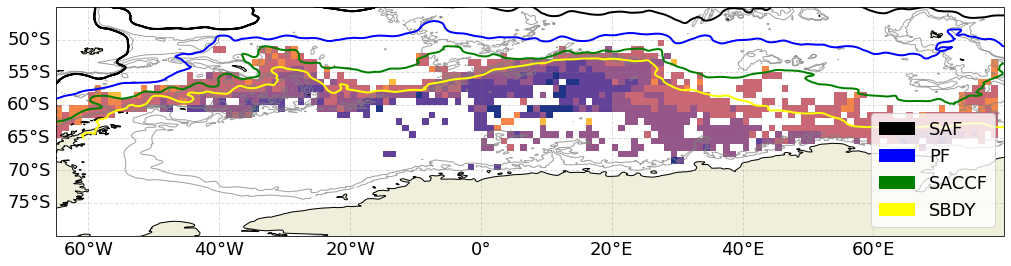

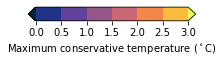

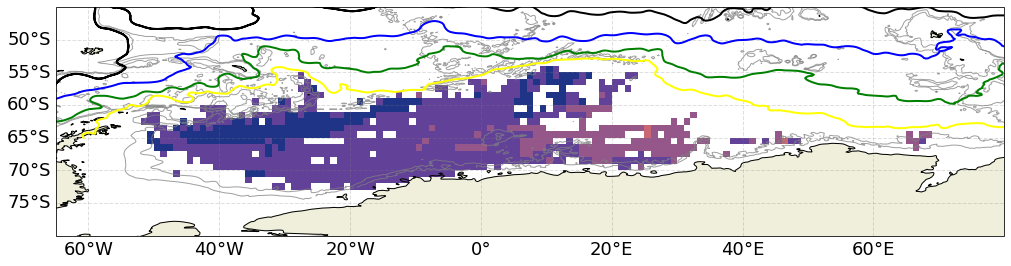

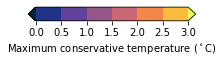

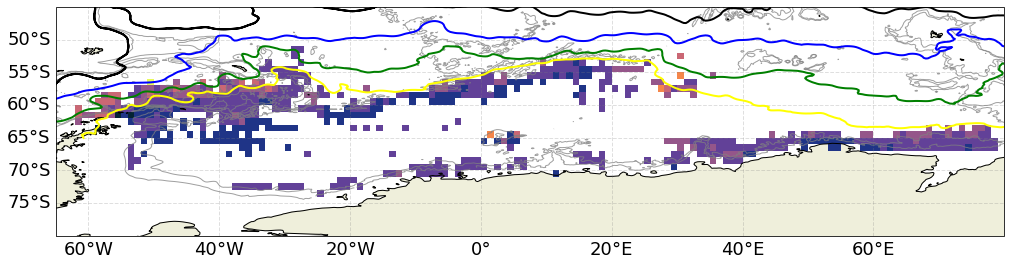

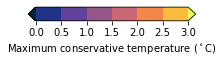

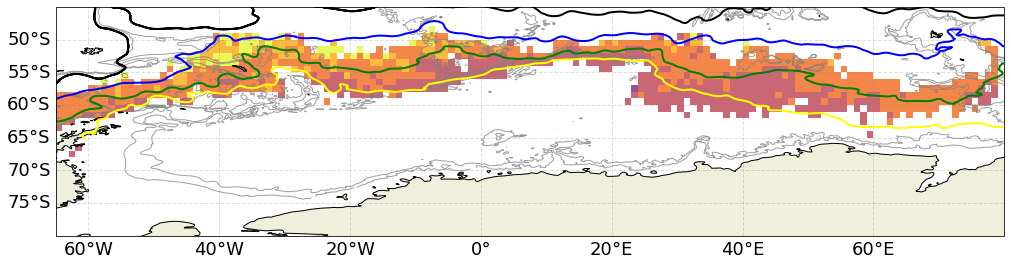

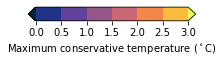

In [10]:
# print stats
print('0=transition, 1=gyre core, 2=gyre edge, 3=circumpolar')
at.calc_oneLevel_stats(ploc, dfp, n_components_selected, 'Tmax')

# histogram map (Tmax)
pt.plot_hist_map(ploc, df1D, lon_range, lat_range,
                 n_components_selected,
                 c_range=(0,3),
                 vartype='Tmax',
                 colormap=cmocean.cm.thermal)

### Depth of salinity max

0=transition, 1=gyre core, 2=gyre edge, 3=circumpolar
class = 0
min / Q25 / Q50 / Q75 / max
160.00 / 640.00 / 730.00 / 910.00 / 1000.00
class = 1
min / Q25 / Q50 / Q75 / max
120.00 / 380.00 / 440.00 / 500.00 / 1000.00
class = 2
min / Q25 / Q50 / Q75 / max
320.00 / 640.00 / 820.00 / 910.00 / 1000.00
class = 3
min / Q25 / Q50 / Q75 / max
180.00 / 910.00 / 1000.00 / 1000.00 / 1000.00
plot_tools.plot_hist_map
file_io.load_bathymetry


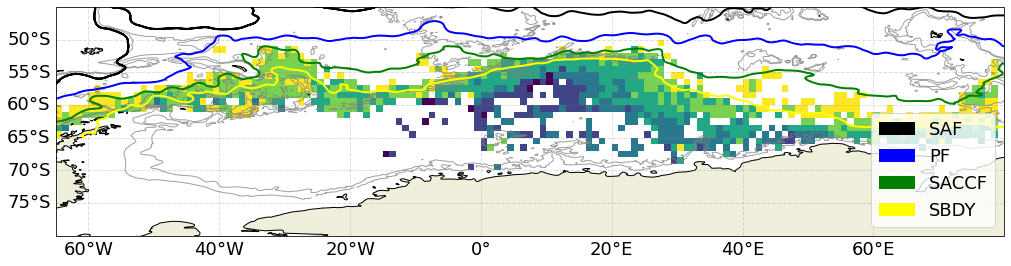

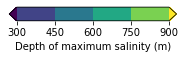

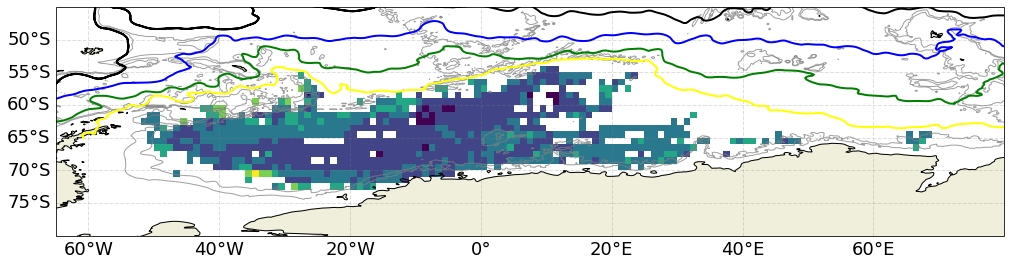

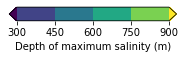

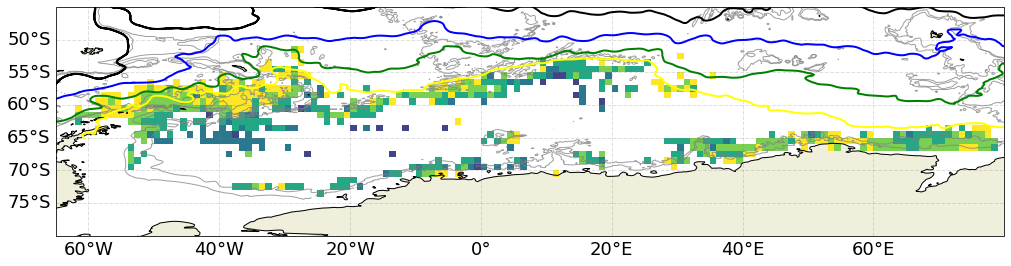

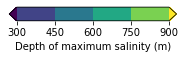

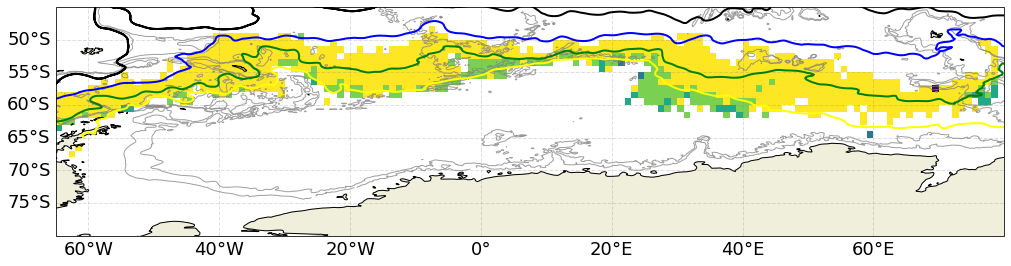

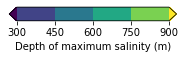

In [11]:
# print mld stats
print('0=transition, 1=gyre core, 2=gyre edge, 3=circumpolar')
at.calc_oneLevel_stats(ploc, dfp, n_components_selected, varname='Smax_depth')

# histogram map (mixed layer depth)
pt.plot_hist_map(ploc, dfp, lon_range, lat_range,
                 n_components_selected,
                 vartype='Smax_depth')

### Depth of salinity minimum

### Minimum salinity

0=transition, 1=gyre core, 2=gyre edge, 3=circumpolar
class = 0
min / Q25 / Q50 / Q75 / max
33.30 / 33.99 / 34.11 / 34.22 / 34.61
class = 1
min / Q25 / Q50 / Q75 / max
32.99 / 34.14 / 34.32 / 34.49 / 34.68
class = 2
min / Q25 / Q50 / Q75 / max
33.01 / 33.98 / 34.21 / 34.37 / 34.67
class = 3
min / Q25 / Q50 / Q75 / max
33.59 / 33.97 / 34.04 / 34.11 / 34.43
plot_tools.plot_hist_map
file_io.load_bathymetry


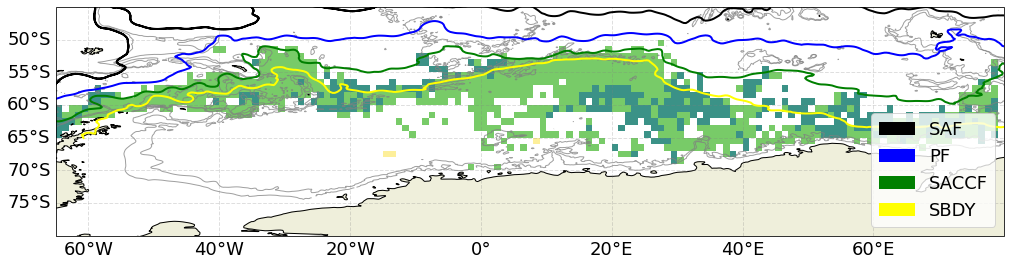

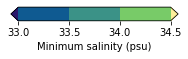

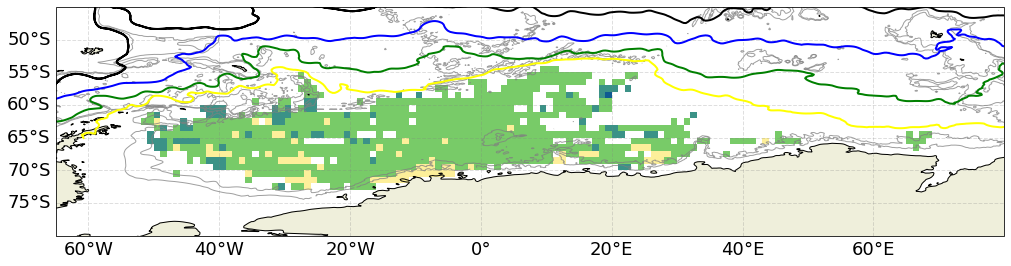

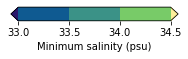

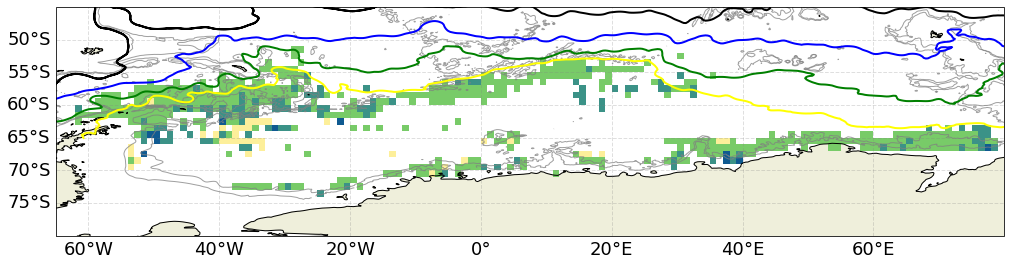

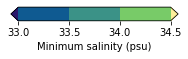

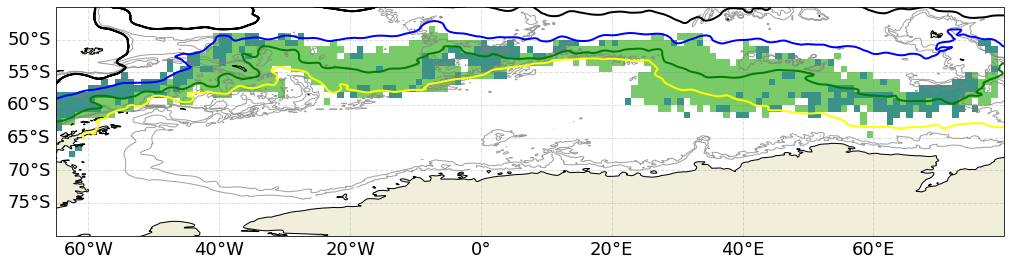

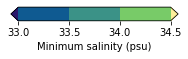

In [12]:
# print stats
print('0=transition, 1=gyre core, 2=gyre edge, 3=circumpolar')
at.calc_oneLevel_stats(ploc, dfp, n_components_selected, 'Smin')

# histogram map (Tmax)
pt.plot_hist_map(ploc, df1D, lon_range, lat_range,
                 n_components_selected,
                 vartype='Smin',
                 colormap=cmocean.cm.haline)

0=transition, 1=gyre core, 2=gyre edge, 3=circumpolar
class = 0
min / Q25 / Q50 / Q75 / max
20.00 / 20.00 / 20.00 / 20.00 / 120.00
class = 1
min / Q25 / Q50 / Q75 / max
20.00 / 20.00 / 20.00 / 20.00 / 80.00
class = 2
min / Q25 / Q50 / Q75 / max
20.00 / 20.00 / 20.00 / 20.00 / 140.00
class = 3
min / Q25 / Q50 / Q75 / max
20.00 / 20.00 / 20.00 / 40.00 / 180.00
plot_tools.plot_hist_map
file_io.load_bathymetry


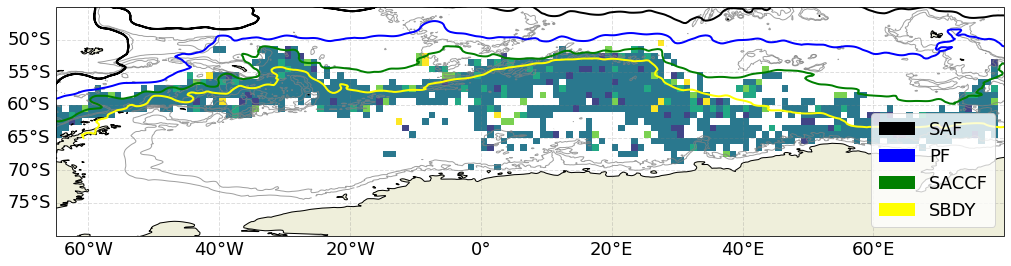

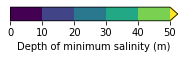

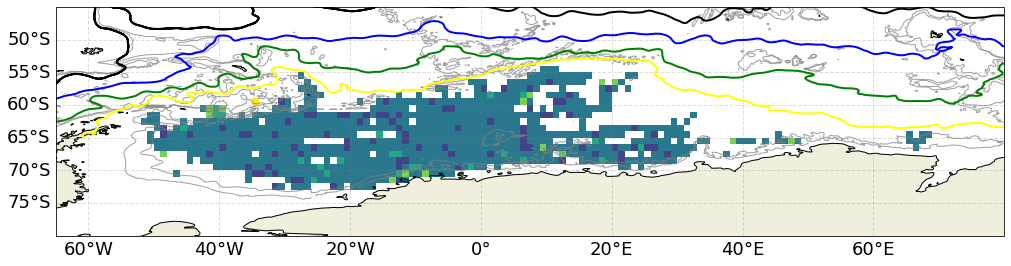

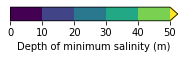

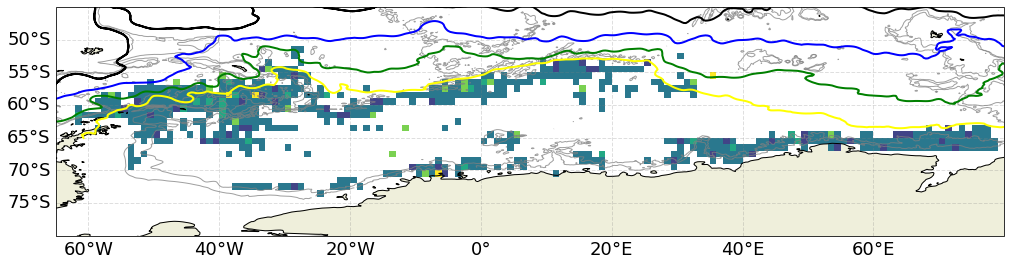

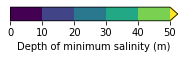

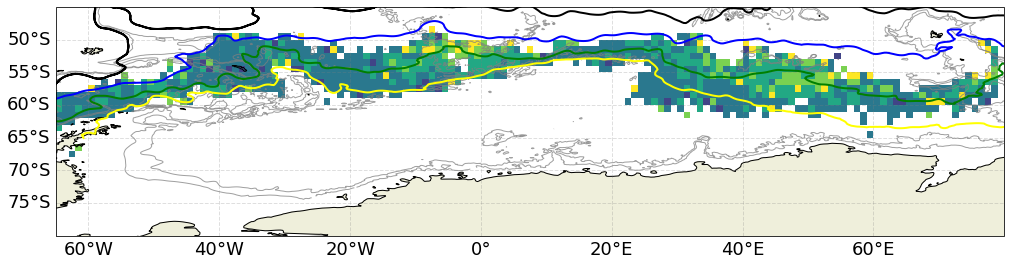

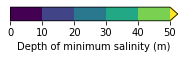

In [13]:
# print stats
print('0=transition, 1=gyre core, 2=gyre edge, 3=circumpolar')
at.calc_oneLevel_stats(ploc, dfp, n_components_selected, varname='Smin_depth')

# histogram map (mixed layer depth)
pt.plot_hist_map(ploc, dfp, lon_range, lat_range,
                 n_components_selected,
                 vartype='Smin_depth')

### Volume histograms 

plot_tools.calc_and_plot_volume_histogram_TS


/srv/conda/envs/notebook/lib/python3.9/site-packages/xarray/core/computation.py:733: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


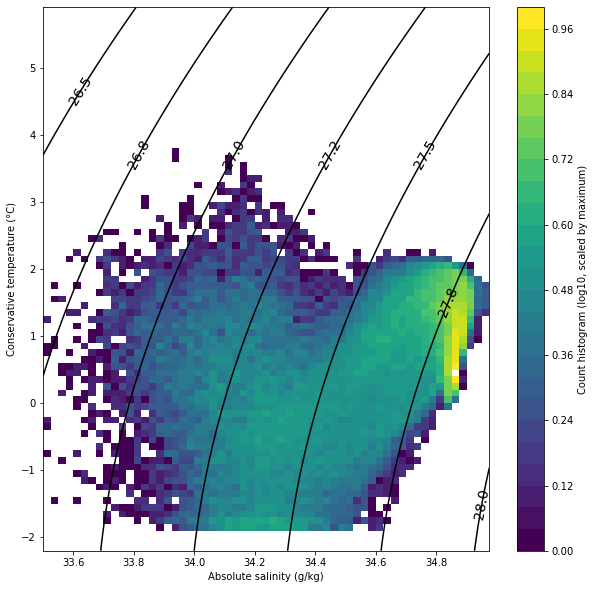

plot_tools.calc_and_plot_volume_histogram_TS


/srv/conda/envs/notebook/lib/python3.9/site-packages/xarray/core/computation.py:733: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


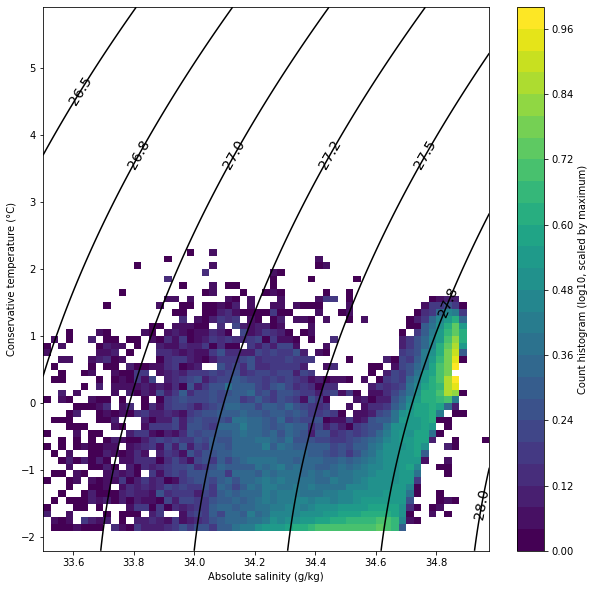

plot_tools.calc_and_plot_volume_histogram_TS


/srv/conda/envs/notebook/lib/python3.9/site-packages/xarray/core/computation.py:733: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


plot_tools.calc_and_plot_volume_histogram_TS


/srv/conda/envs/notebook/lib/python3.9/site-packages/xarray/core/computation.py:733: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


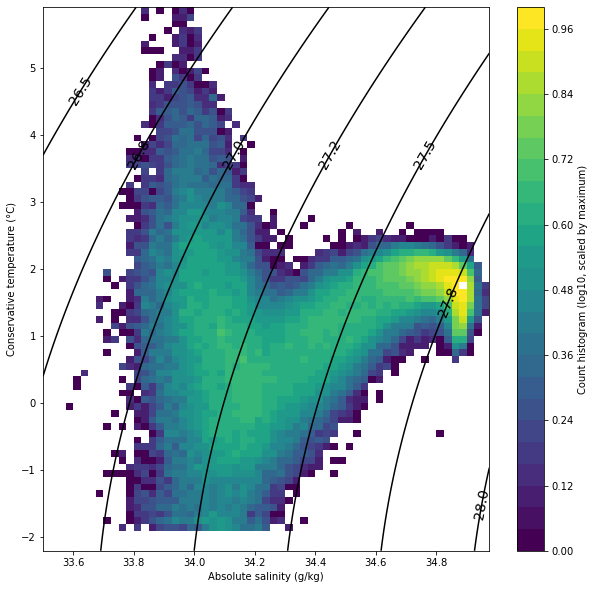

In [14]:
# some T-S histograms
sbins = np.arange(Srange[0], Srange[1], 0.025)
tbins = np.arange(Trange[0], Trange[1], 0.1)
df_select = dfp.where(dfp.label==0, drop=True)
histTS_class1 = pt.calc_and_plot_volume_histogram_TS(ploc, df_select, sbins=sbins, tbins=tbins, modStr='class1')
df_select = dfp.where(dfp.label==1, drop=True)
histTS_class2 = pt.calc_and_plot_volume_histogram_TS(ploc, df_select, sbins=sbins, tbins=tbins, modStr='class2')
df_select = dfp.where(dfp.label==2, drop=True)
histTS_class3 = pt.calc_and_plot_volume_histogram_TS(ploc, df_select, sbins=sbins, tbins=tbins, modStr='class3')
df_select = dfp.where(dfp.label==3, drop=True)
histTS_class4 = pt.calc_and_plot_volume_histogram_TS(ploc, df_select, sbins=sbins, tbins=tbins, modStr='class4')

### T-S histogram by month

plot_tools.plot_hist_map


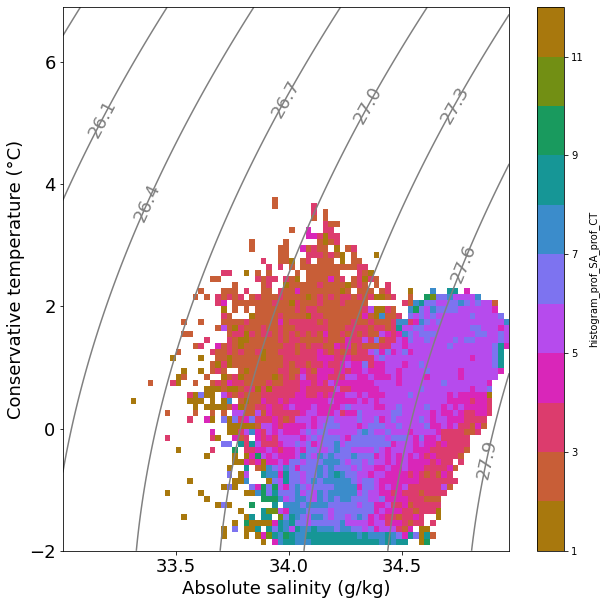

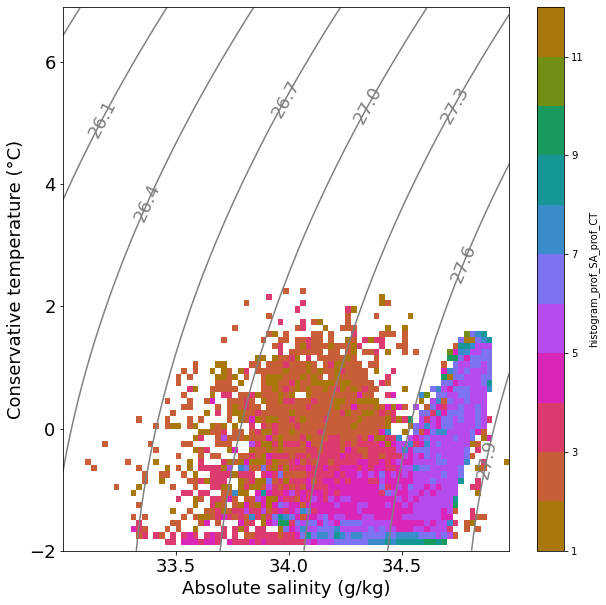

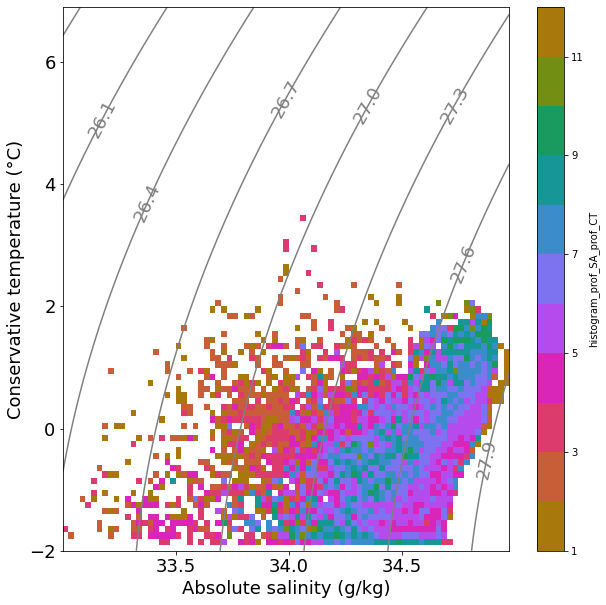

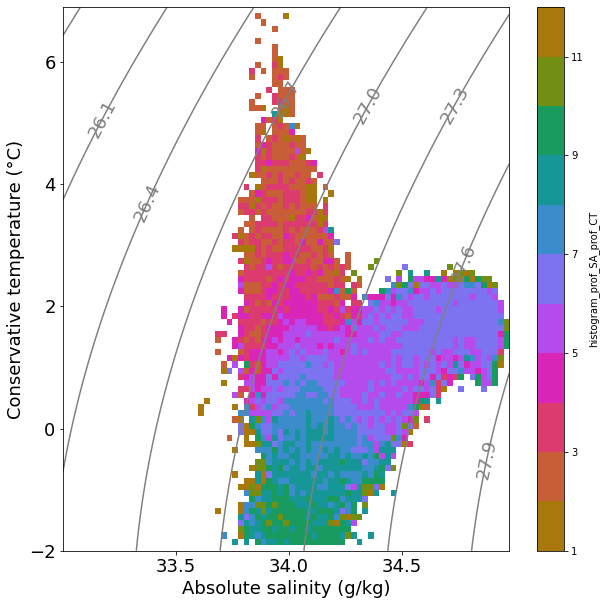

In [15]:
pt.plot_hist_TS(ploc, dfp, n_components_selected,
                sbins = np.arange(33, 35, 0.025), 
                tbins = np.arange(-2, 7, 0.1),
                vartype='month',
                colormap=cmocean.cm.phase)

### T-S histogram by year

plot_tools.plot_hist_map


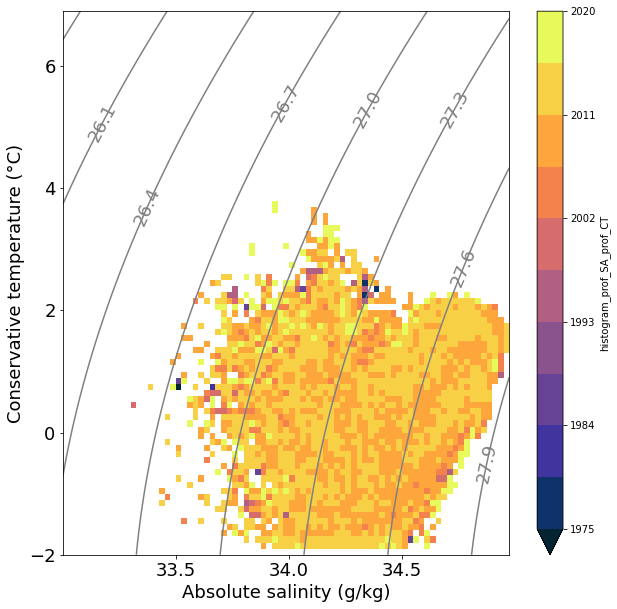

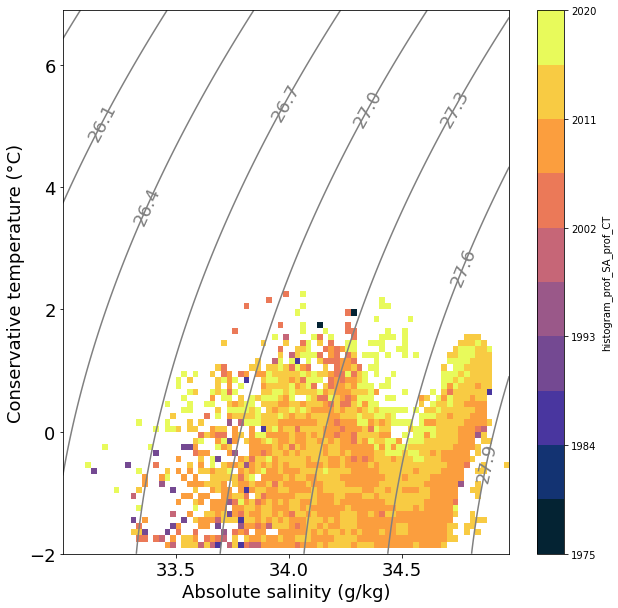

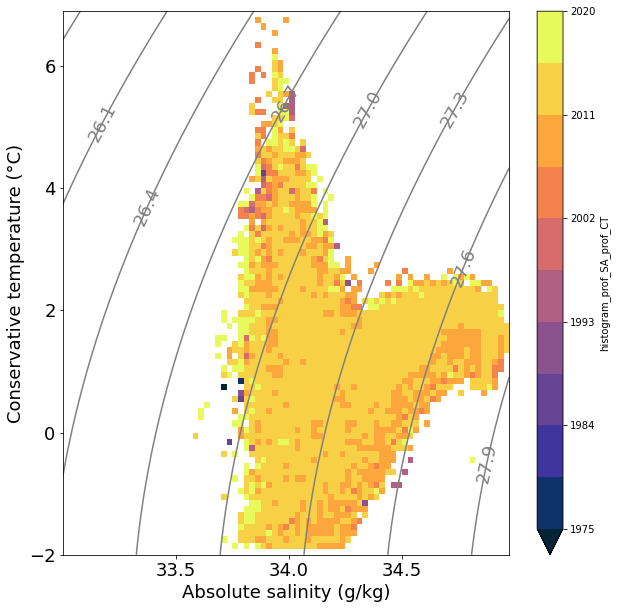

In [16]:
pt.plot_hist_TS(ploc, dfp, n_components_selected,
                sbins = np.arange(33, 35, 0.025), 
                tbins = np.arange(-2, 7, 0.1),
                vartype='year',
                crange=[1975, 2020],
                colormap=cmocean.cm.thermal)

### T-S histogtram by MLD

plot_tools.plot_hist_map


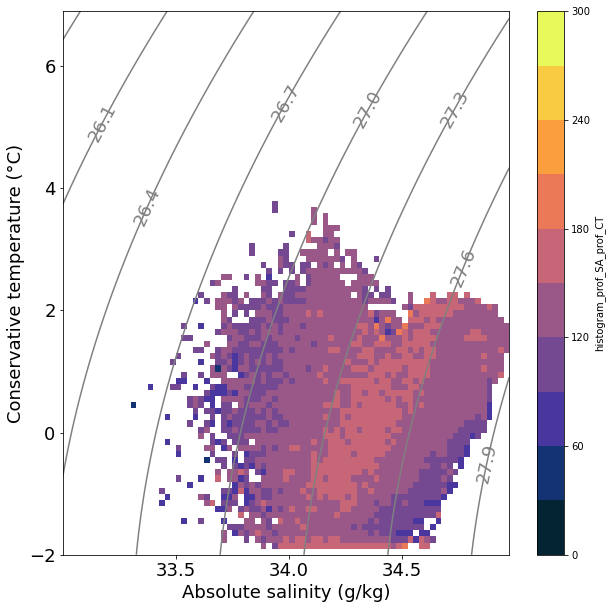

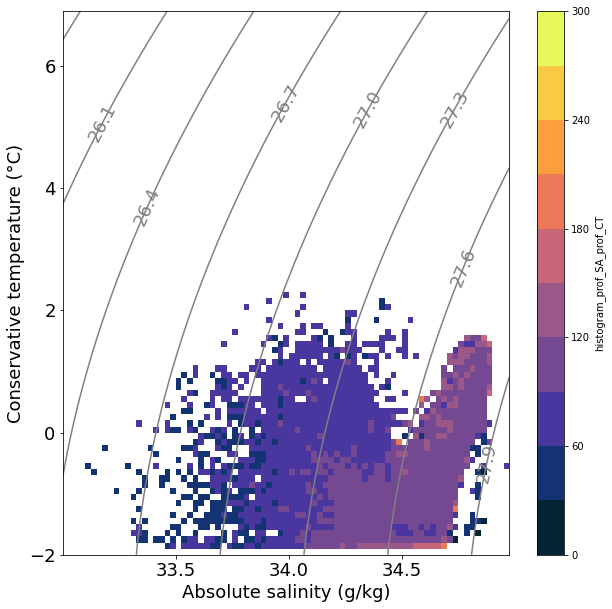

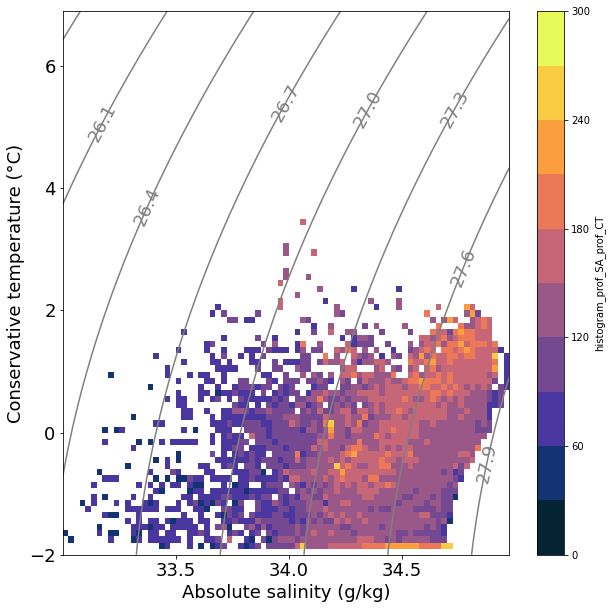

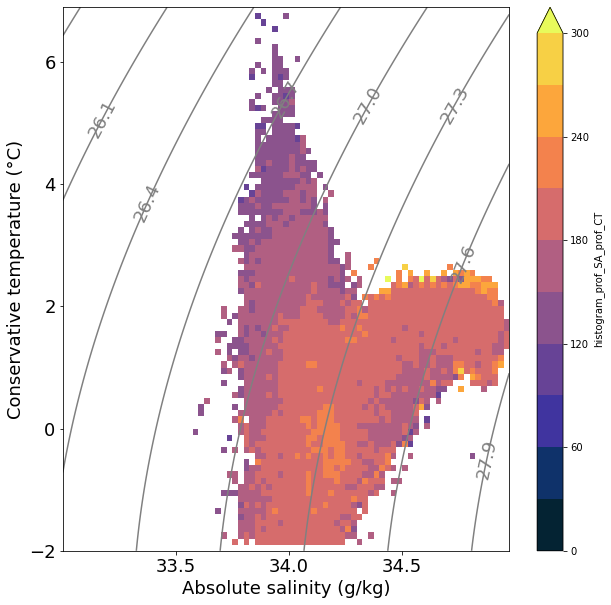

In [17]:
pt.plot_hist_TS(ploc, dfp, n_components_selected,
                sbins = np.arange(33, 35, 0.025), 
                tbins = np.arange(-2, 7, 0.1),
                vartype='mld',
                crange=[0, 300],
                colormap=cmocean.cm.thermal,
                fs=18)

### T-S histogram by imetric

plot_tools.plot_hist_map


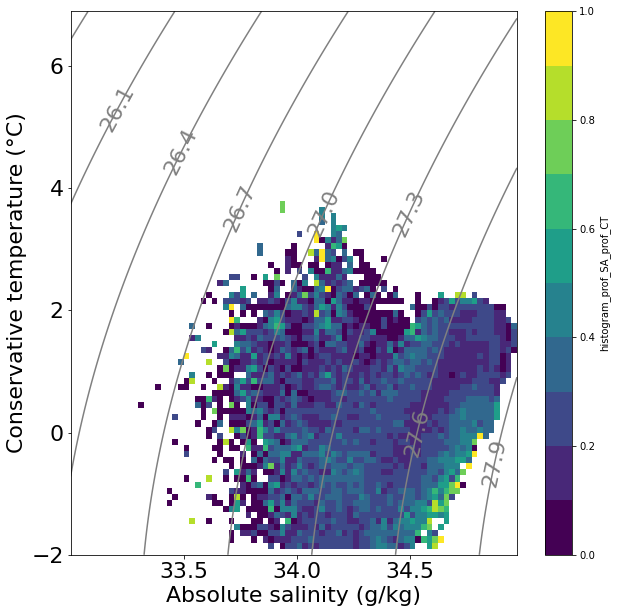

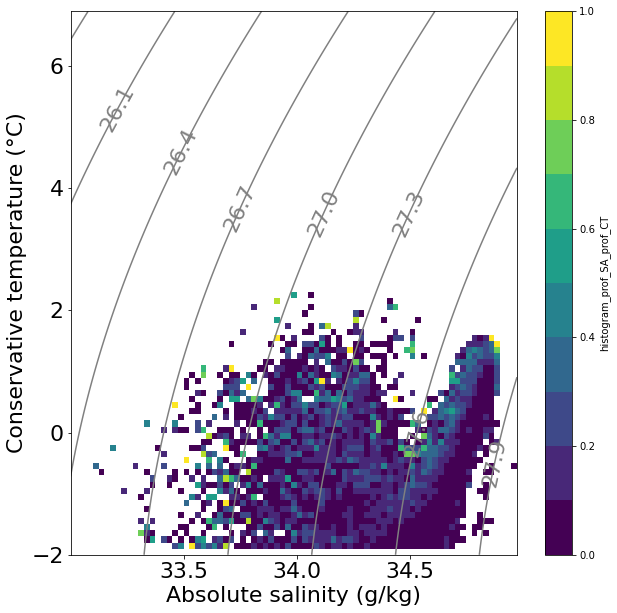

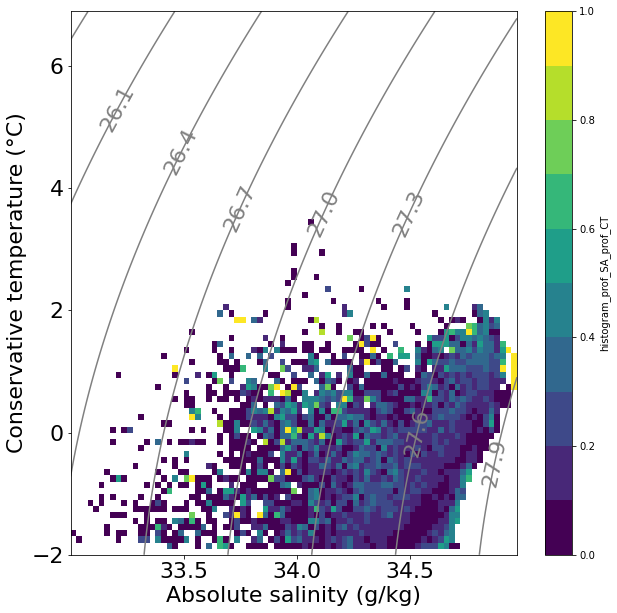

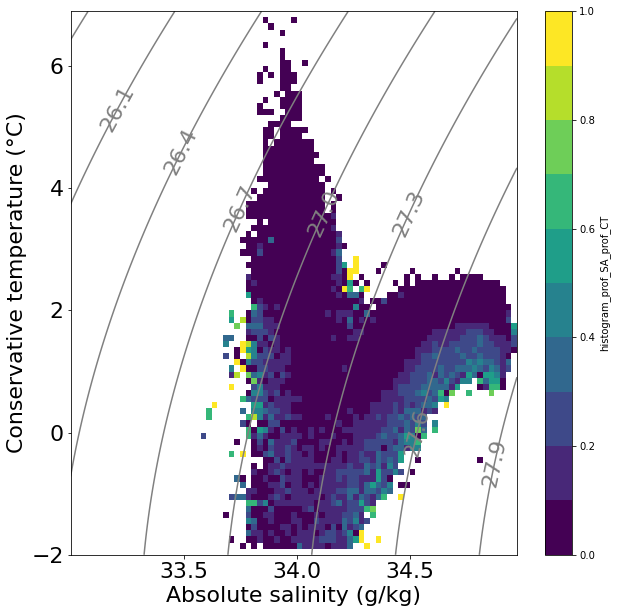

In [18]:
pt.plot_hist_TS(ploc, dfp, n_components_selected,
                sbins = np.arange(33, 35, 0.025), 
                tbins = np.arange(-2, 7, 0.1),
                vartype='imetric',
                crange=[0,1],
                colormap=plt.get_cmap('viridis'),
                fs=22)

### Get mean label in each 1x1 bin

plot_tools.plot_hist_map
file_io.load_bathymetry


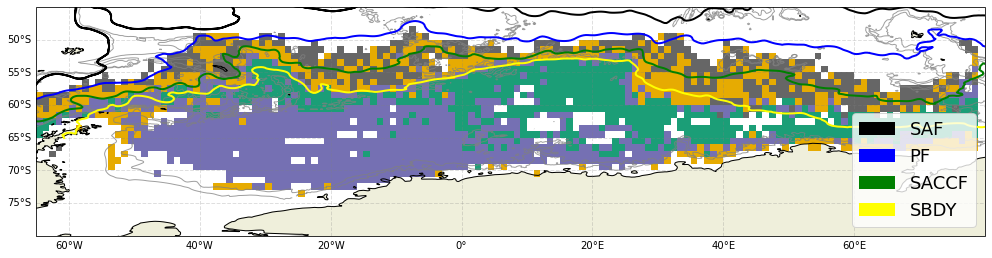

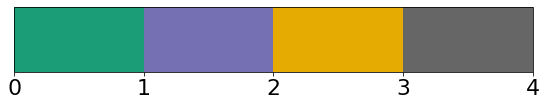

In [19]:
pt.plot_hist_map(ploc, dfp,
                 lon_range, lat_range,
                 n_components_selected,
                 c_range=[0,4],
                 vartype='label',
                 colormap=colormap)

### Split the gyre edge class

analysis.split_single_class_by_box


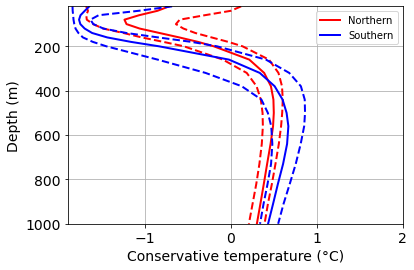

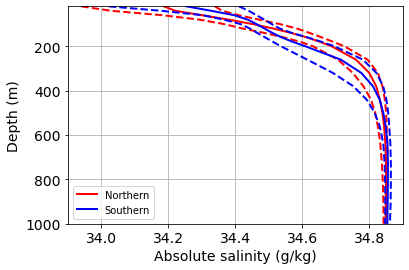

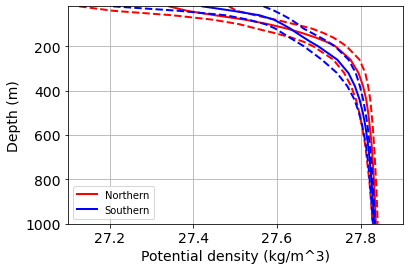

In [20]:
# split edge class into northern extend and southern extent
edge_north, edge_south = at.split_single_class_by_box(dfp, class_split=2, box_edges=[-60, 20, -65, -55])

# compare the two collections of profiles
pt.compare_two_collections(ploc, edge_north, edge_south)